# Tech Stock Analysis

I will be analyzing stocks from 5 different tech companies from 1/1/2013 to 12/30/2017. As a data scientist, one of my interests is doing algorithmic trading. I have done similiar analysis for crypto currencies, but stocks prove to be less volatile. The performance and the volatility of the stock are key questions when calculating the Sharpe Ratio. The optimal portfolio allocation will be based on the Sharpe ratio.

I used data from a company called Quandl. https://www.quandl.com/

<img src="Companies.png">

## Questions to Answer

1. Which company stock performed better?
2. Which stock is the most volatile?
3. How related are the tech companies?
4. What is the optimal portfolio allocation?

## Findings

1. The Facbook Stock performed better, with a Cummulative return of 6.3 (If I invested \$1 at the beginning of series I would get \$6.30 back.)
2. Facebook and Amazon are the most volatile.
3. Amazon and Google are the most correlated, followed by Google and Facebook.
4. The optimal portfolio is 15% Google, 23% Amazon, 29% Facebook, 32% Intel and 0% IBM.
5. If started with an investment of \$100,000 in 2013 I would have ended up \$418,319 based on the optimal allocation! Keep in mind, what makes the portfolio optimal is maximizing returns while reducing risk/volatility.

###  \**** Note: In order to use this, you must make sure you pip/conda insall the quandl package. \****

### Initialize & Setup

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import quandl
import seaborn as sns
%matplotlib inline

In [2]:
#Setup Time stamps
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2017,12,30)

#Company Dictionary
company_names = {
            'google':'WIKI/GOOGL',
            'amazon':'WIKI/AMZN',
            'facebook':'WIKI/FB',
            'intel':'WIKI/INTC',
            'ibm':'WIKI/IBM'
}

#Function to build out the company dictionary with dataframes
def build_company(dict):
    companies = {}
    for key,value in dict.items():
        companies[key] = quandl.get(value,start_date = start, end_date=end, api_key='etr5X48rp9e5_GTXJboB')
    return companies

#Call Function
company_dict = build_company(company_names)

#Setup Parameters for Subplots
num_col = 2
num_row = math.ceil(len(company_dict)/2)

The reason I decided to use a function to build my dataframes and place it in a dictionary is for scalability.  In the future, if I want to add more stocks or remove, I simply have to edit the company_names dictionary, and the rest of the notebook will automatically adjust.

## Which stock Performed better?

There are various ways to look at stock performance. Im going to look at a couple here:

1. The Open/Close price
2. Total Money traded
3. Returns

Ultimately Im going to look at which stock had the highest return if invested $1, this is also known as Cummulative return.

### Open Price

The following graph shows the open price for all of the stocks I am analyzing.

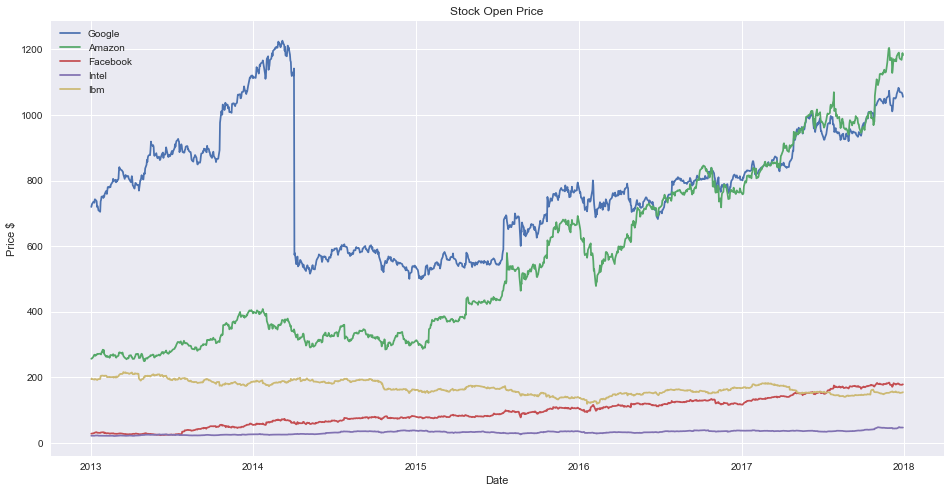

In [3]:
plt.figure(figsize=(16,8))

#Place all of the companies on a single graph
for key,value in company_dict.items():
        plt.plot(value['Open'], label=key.title())

plt.title('Stock Open Price')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.legend()
plt.show()    

Note: The reason for the big Drop in Google price in 2014 was because of a stock split.

#### Open Price Moving Averages

A good way to look at trends is to use Moving Averages. This helps reduce the noise so we can focus on the trends.

In [4]:
#Add the 100 Day Moving average to each dataframe.
for key,value in company_dict.items():
        value['MA100'] = value['Open'].rolling(window=100).mean()

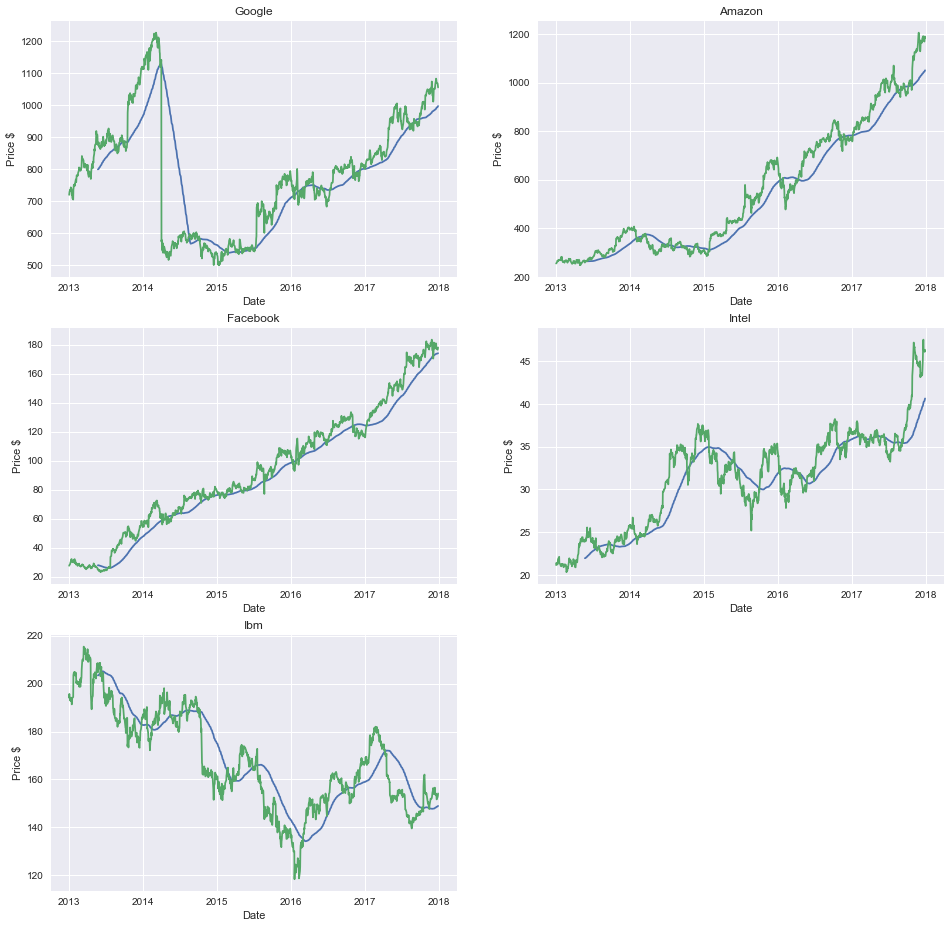

In [5]:
#Create a subplot for each company
plt.figure(figsize=(16,16))

count = 0
for key, value in company_dict.items():
    count += 1
    plt.subplot(num_row, num_col, count)
    plt.plot(value[['MA100','Open']])
    plt.ylabel('Price $')
    plt.xlabel('Date')
    plt.title(key.title())

As you can see, all of the stocks besided IBM are moving up. 

### Total Money Traded

This isnt true market cap, but its an indication of how the stock is performing. Its calculated by multiplying the open price by the volume of stock traded.

In [6]:
#Add Total Traded
for key,value in company_dict.items():
        value['Total Traded'] = value['Open']*value['Volume']

The following graphs to show the raw Total Traded. 

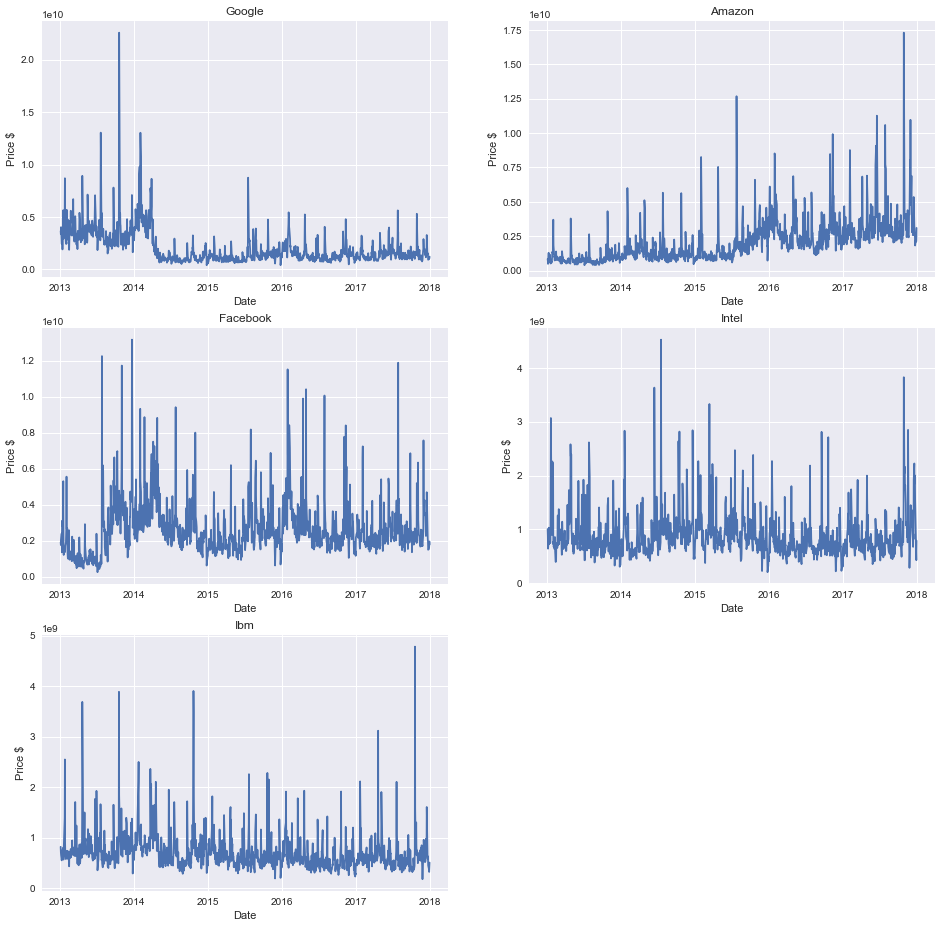

In [7]:
import math
plt.figure(figsize=(16,16))
num_col = 2
num_row = math.ceil(len(company_dict)/2)
count = 0
for key, value in company_dict.items():
    count += 1
    plt.subplot(num_row, num_col, count)
    plt.plot(value['Total Traded'])
    plt.ylabel('Price $')
    plt.xlabel('Date')
    plt.title(key.title())

Looking at the raw volume trading doesnt provide too much value. However, you can use expanding. Expanding plots taks every data point from the start of the series (unlike moving average plots which are shifted by the window). 

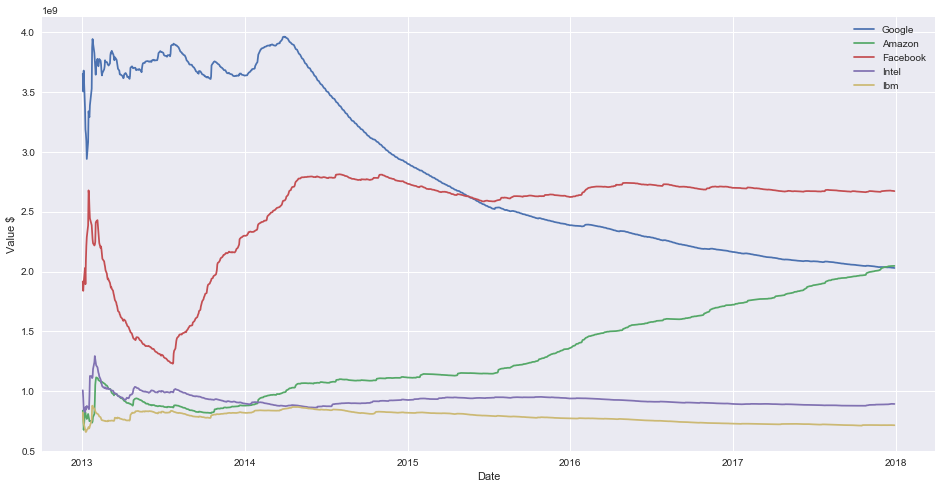

In [8]:
#Rolling value from the start
plt.figure(figsize=(16,8))

for key,value in company_dict.items():
        plt.plot(value['Total Traded'].expanding(min_periods=1).mean(), label=key.title())

plt.xlabel('Date')
plt.ylabel('Value $')
plt.legend()
plt.show()

This shows that Amazon is increasing while Google is decreasing.

Finally, to help answer the question which stock performed better, we have to look at the returns.

### Daily Returns

With Daily cummulative returns, the question we are trying to answer is, if I invested $1 at the beginning of the time series (1/1/2013), how much would it be worth today?

This simple calculation does not take into account stocks that give dividends.

<b> Daily Return </b>: Is the profit or loss made by the stock compared to the previous day. An example would look like this:

Lets say Google's stock looked like this:

    Date                        Price
    01/01/2017                   10
    01/02/2017                   15
    01/03/2017                   20
    01/04/2017                   25

Then the Daily return would be:

    Date                         Daily Return                  %Daily Return
    01/01/2017                 10/10 =  1                          -   
    01/02/2017                 15/10 =  3/2                       50%
    01/03/2017                 20/15 =  4/3                       33%
    01/04/2017                 25/20 =  5/4                       20%

<b> Cummulative Return </b>: gives the gains the investor has made to date. It is calculated relative to the day the investment is made. If the return is above 100% you are making a profit, if it is below, you are making a loss. 

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $


Continuing with the example, the cummulative return would be:

    Date                       Cumulative Return         %Cumulative Return
    01/01/2017                  10/10 =  1                         100 %   
    01/02/2017                  15/10 =  3/2                       150 %
    01/03/2017                  20/10 =  2                         200 %
    01/04/2017                  25/10 =  5/2                       250 %

In [9]:
#Add the daily and Cummulative Return
for key,value in company_dict.items():
        value['returns'] = value['Close'].pct_change(1)
        value['Cummulative Return'] = (1 + value['returns']).cumprod()

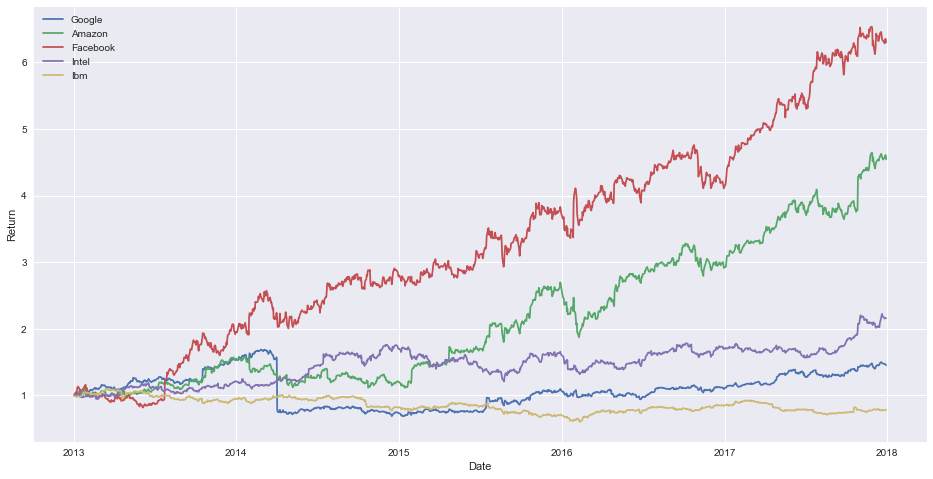

In [10]:
#Cummulative Return Plot
plt.figure(figsize=(16,8))

for key,value in company_dict.items():
        plt.plot(value['Cummulative Return'], label=key.title())

plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

As you can see, Facebook has the highest cummulative return  of 6.3.

There is another way to calucate the returns is by using the log. I will discuss that further down in this notebook.

## Which stock is more volatile?

In order to look at volatility, need to look at a historgram of the returns. Notice the data is normally distributed. Here I used 3 different plots. A histogram, KDE, and box plot of the returns.

The histogram and KDE shows the "spread" of the data. The box plot also shows the spread in way by showing where the quartiles are and the outliers.

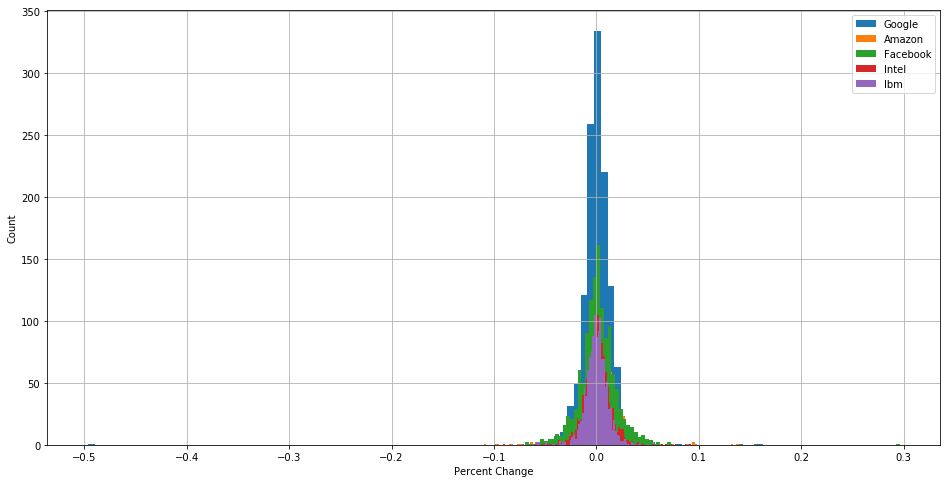

In [77]:
#Volatility
plt.figure(figsize=(16,8))

for key,value in company_dict.items():
    value['returns'].hist(bins=100, label=key.title())

plt.xlabel('Percent Change')
plt.ylabel('Count')
plt.legend()
plt.show()

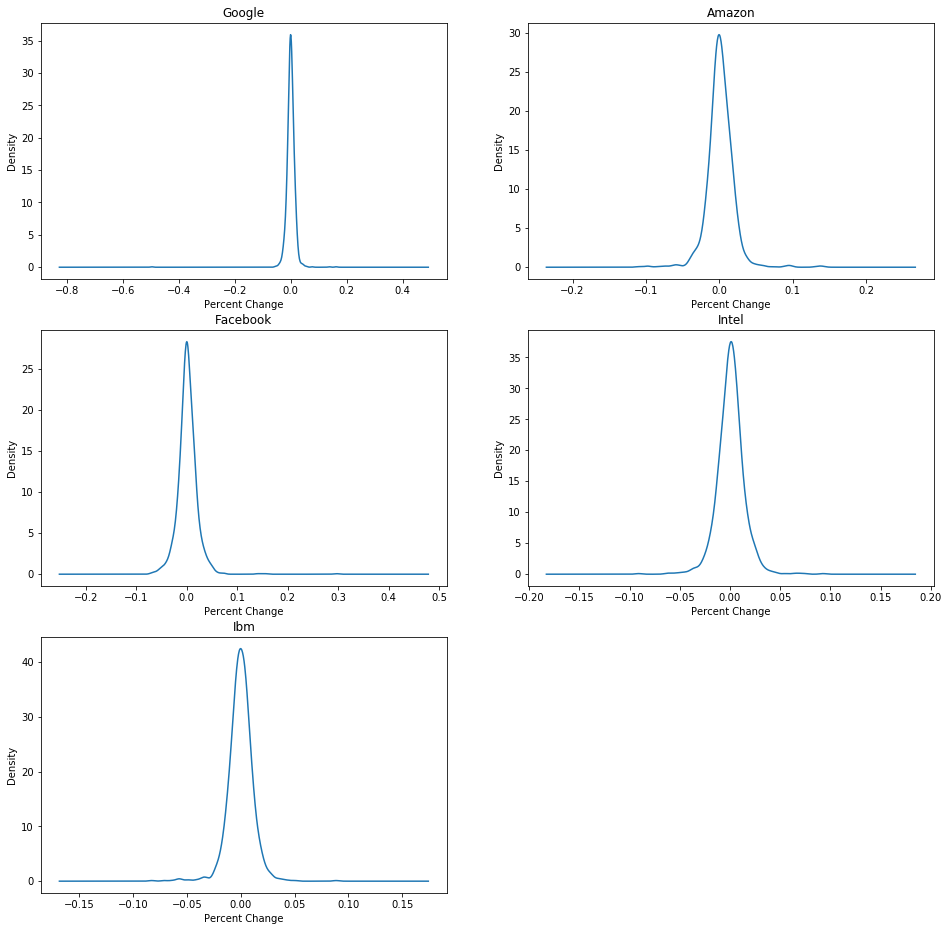

In [78]:
plt.figure(figsize=(16,16))
num_col = 2
num_row = math.ceil(len(company_dict)/2)
count = 0
for key, value in company_dict.items():
    count += 1
    plt.subplot(num_row, num_col, count)
    value['returns'].plot(kind='kde')
    plt.ylabel('Density')
    plt.xlabel('Percent Change')
    plt.title(key.title())

To make a box plot, its easier to just have the returns. So Im making a new dataframe called box_df which is a collection of the returns for each company.

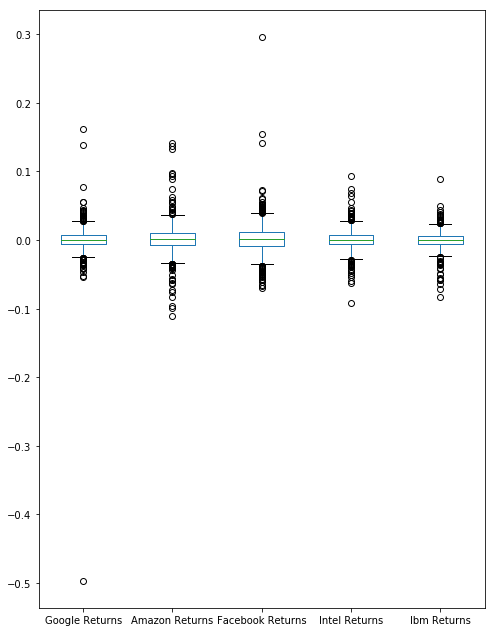

In [79]:
#Create a dataframe to make plotting box plot easier
box_list = []
box_columns = []
for key, value in company_dict.items():
    box_list.append(value['returns'])
    box_columns.append(key.title()+' Returns')

box_df = pd.concat(box_list,axis=1)

box_df.columns = box_columns
box_df.plot(kind='box',figsize=(8,11))

This shows the stock returns are not that volatile. But Amazon and Facebook are the most volatile.

### Log Return

Most analysis techniques requires the data to be detrended. We do this, so we can focus on the fluctionations of the data and not the trend. A great way to do this is through the log. However, since we are doing simple analysis, there isnt much difference in the log return and the daily return.

Before we begin, lets create a new dataframe to just hold the adjusted close price.

In [14]:
#Create new dataframe to hold the Adjusted close price
stock_list = []
stock_columns = []
for key, value in company_dict.items():
    stock_list.append(value['Adj. Close'])
    stock_columns.append(key.title())


stocks_df = pd.concat(stock_list,axis=1)
stocks_df.columns = stock_columns
stocks_df.head()

,Google,Amazon,Facebook,Intel,Ibm
Date,,,,,
2013-01-02,362.744758,257.3100,28.0000,18.101359,168.890592
2013-01-03,362.955409,258.4800,27.7700,18.050560,167.961630
2013-01-04,370.127548,259.1500,28.7600,17.915096,166.860637
2013-01-07,368.512563,268.4592,29.4213,17.991295,166.129509
2013-01-08,367.785318,266.3800,29.0607,17.855831,165.897268


Now lets take the log return.

In [16]:
#Log returns detrend or normalized the data.
log_ret = np.log(stocks_df/stocks_df.shift(1))
log_ret.head()

,Google,Amazon,Facebook,Intel,Ibm
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.000581,0.004537,-0.008248,-0.002810,-0.005516
2013-01-04,0.019568,0.002589,0.035029,-0.007533,-0.006577
2013-01-07,-0.004373,0.035292,0.022733,0.004244,-0.004391
2013-01-08,-0.001975,-0.007775,-0.012332,-0.007558,-0.001399


Lets test the log return and the daily returns we calculated earlier.

In [11]:
#Create a new dataframe for the returns to compare
test_return = []
test_return_columns = []
for key, value in company_dict.items():
    test_return.append(value['returns'])
    test_return_columns.append(key.title())


test_return_df = pd.concat(test_return,axis=1)
test_return_df.columns = test_return_columns

In [12]:
test_return_df.head()

,Google,Amazon,Facebook,Intel,Ibm
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.000581,0.004547,-0.008214,-0.002806,-0.005500
2013-01-04,0.019760,0.002592,0.035650,-0.007505,-0.006555
2013-01-07,-0.004363,0.035922,0.022994,0.004253,-0.004382
2013-01-08,-0.001973,-0.007745,-0.012256,-0.007529,-0.001398


Notice, the test_return_df values are very similiar to the log return. In essence, the log is just another way of calculating the daily return.

## How related are the tech companies?

Sometimes it is important to see how related the returns are for certain companies. This is especially important with companies in the same sector (Technology). 

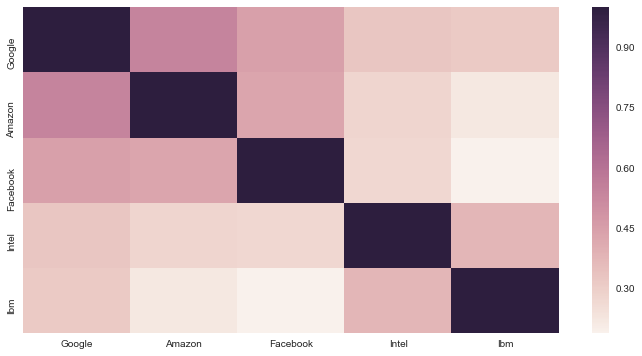

In [85]:
#Lets look to see if any of these stock returns are correlated
plt.figure(figsize=(12,6))
sns.heatmap(stocks_df.pct_change(1).corr())

This shows that Amazon and Google are correlated, but Facebook and IBM are not.

## What is the optimal portfolio allocation?

Before we talk about portfolio allocation, I need to introduce the Sharpe Ratio. It is a measure for calculating the risk free adjusted return, and this is an industry standard. In the US, the risk free rate is placing your money in the bank with very low interest and is assumed to be ~ 0%. 

The Sharpe ratio is calculated by:
Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return.

Or in other words what is the annualized return divided by the volatility.


Any Sharpe ratio greater than 1 is considered good by investors. Higher than 2 is rated as very good, and 3 or higher is considered excellent.


I am going to use the Sharpe ratio to get the best portfolio allocation. I will run the simulation num_portfolio times. It will randomly assign weights and then calculate the Sharpe ratio at that allocation. Finally I will get the max Sharpe ratio and determine the allocation that produced that.

In the code you will notice I multiply by 252. This is the annualize the Sharpe ratio by the number of trading days.

In [19]:
num_portfolio = 10000
num_stocks = len(stocks_df.columns)
all_weights = np.zeros((num_portfolio, num_stocks))
ret_arr = np.zeros(num_portfolio)
vol_arr = np.zeros(num_portfolio)
sharpe_arr = np.zeros(num_portfolio)

np.random.seed(101)

for index in range(num_portfolio):    
    weights = np.array(np.random.random(num_stocks))
    weights = weights/np.sum(weights)

    #Save Weights (using numpy broadcasting)
    all_weights[index,:] = weights
    
    # Expectet Return
    ret_arr[index] = np.sum(log_ret.mean() * weights * 252)

    #Expected volatility - using linear algebra and covariance instead of correlation.
    vol_arr[index] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    

    #Sharpe Ratio
    sharpe_arr[index] = ret_arr[index]/vol_arr[index]

In [20]:
#Highest Sharpe Ratio
sharpe_arr.max()

1.4075345793945746

In [19]:
#Find the highest Sharpe Ratio
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

Now lets find the best allocation based on the max Sharpe Ratio.

In [20]:
#Show the optimal allocation based on the max sharpe ratio
allocation_list = all_weights[sharpe_arr.argmax(),:]
allocation = pd.DataFrame(allocation_list.reshape(-1, len(allocation_list)), columns=stock_columns)

allocation

,Google,Amazon,Facebook,Intel,Ibm
0,0.146088,0.232365,0.298981,0.320176,0.00239


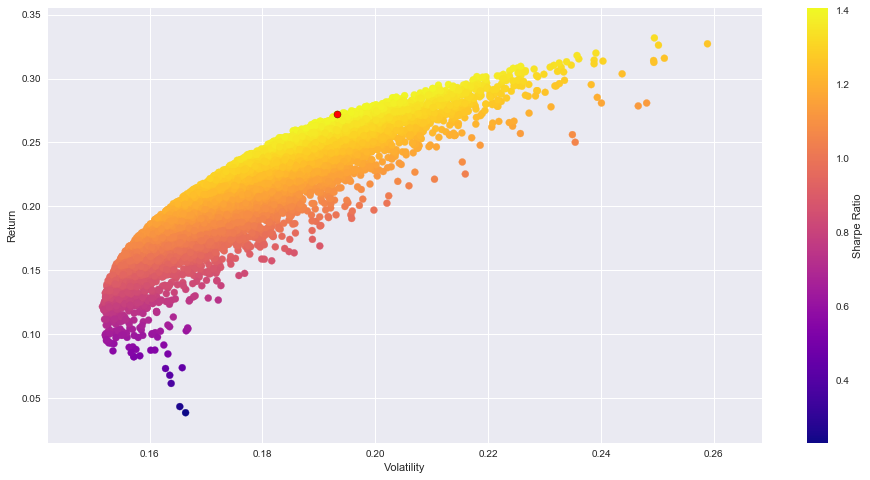

In [21]:
plt.figure(figsize=(16,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

#Add point with the max Sharpe Ratio
plt.scatter(max_sr_vol,max_sr_ret, c='red',s=50, edgecolor='black')

This plot shows the volatility of the stock plotted against the return, and the color is mapped to the Sharpe Ratio. The edge of the graph shows the optimum Sharpe ratio given a volatility.

### Now lets back test our portfolio

Now we know the optmial portfolio allocation of our stocks, lets see how it would have performed from the begining of our time series.

In [24]:
#Created a function to add normalized proces, this should be the same as cummulative return
for key,value in company_dict.items():
        value['Normed Return'] = value['Adj. Close']/value.iloc[0]['Adj. Close']

In [25]:
#Assign allocation
for key,value in company_dict.items():
    value['Allocation'] = value['Normed Return']*allocation[key.title()][0]

### Investment of $100,000 into this portfolio. Lets see how this does.

In [26]:
#Assign Position values.
investment = 100000
for key,value in company_dict.items():
    value['Position Values'] = value['Allocation']*investment

In [27]:
#Create a new dataframe for the portfolio
portfolio = []
portfolio_columns = []
for key, value in company_dict.items():
    portfolio.append(value['Position Values'])
    portfolio_columns.append(key.title())


portfolio_df = pd.concat(portfolio,axis=1)
portfolio_df.columns = portfolio_columns

#Add Total Position Column
portfolio_df['Total Position'] = portfolio_df.sum(axis=1)
portfolio_df.head()

,Google,Amazon,Facebook,Intel,Ibm,Total Position
Date,,,,,,
2013-01-02,14608.807882,23236.496661,29898.123010,32017.602801,238.969645,100000.000000
2013-01-03,14617.291393,23342.154043,29652.531286,31927.749847,237.655220,99777.381790
2013-01-04,14906.134743,23402.658698,30709.643492,31688.141968,236.097384,100942.676286
2013-01-07,14841.094492,24243.330241,31415.773090,31822.921400,235.062884,102558.182107
2013-01-08,14811.806181,24055.567139,31030.727977,31583.313521,234.734278,101716.149096


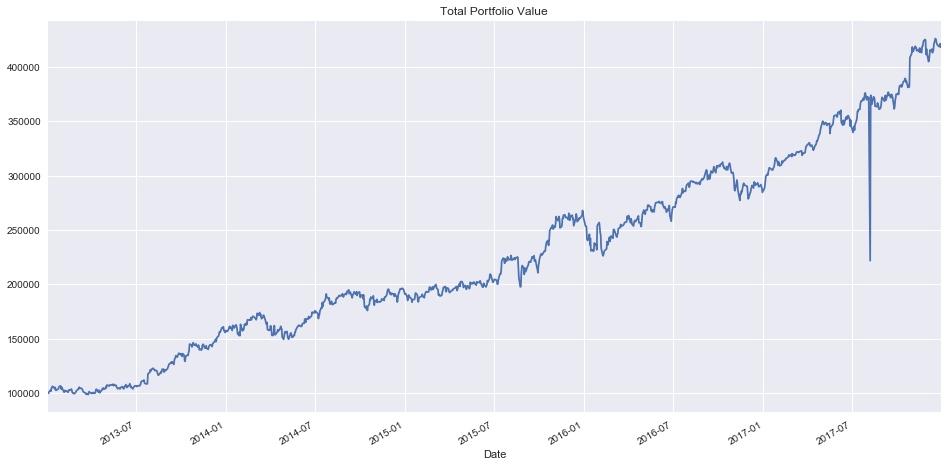

In [28]:
#Plot the Total Position
portfolio_df['Total Position'].plot(figsize=(16,8))
plt.title('Total Portfolio Value')

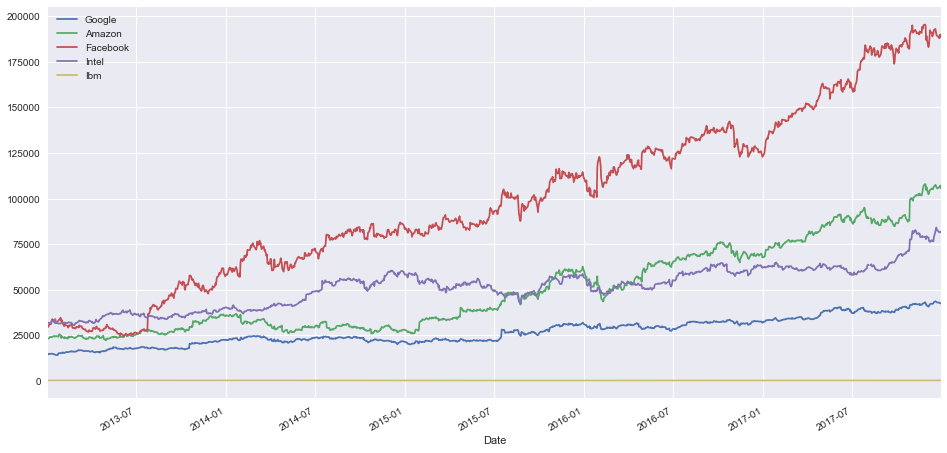

In [29]:
#Look at the potistions individually
portfolio_df.drop('Total Position',axis=1).plot(kind='line', figsize=(16,8))

### Portfolio Statistics

If started with an investment of \$100,000 will end up with \$418,319!

In [122]:
portfolio_df['Daily Return'] = portfolio_df['Total Position'].pct_change(1)
cum_ret = 100 * (portfolio_df['Total Position'][-1]/portfolio_df['Total Position'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 318.31998830247034 was percent!


In [125]:
daily = portfolio_df['Daily Return'].mean()
print('Our average daily return mean was {} percent'.format(daily))

Our average daily return mean was 0.0014409925742878645 percent


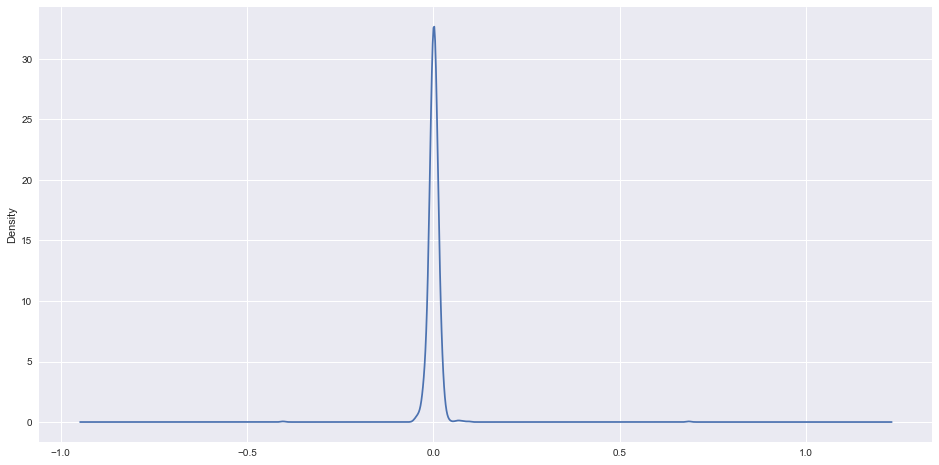

In [127]:
#Standard Deviation
portfolio_df['Daily Return'].plot(kind='kde', figsize=(16,8))

## Conclustion

Through this analysis we identified the optimal portfolio that gives us the highest Sharpe ratio. Even though, I showed that the Facebook stock was the best performing, the goal of a good stock portfolio is to both maximize returns and minimize risk. 

We also noticed that some of the tech stocks' returns are correlated. Please note that his notebook is not stock advice. I have used similiar analysis to invest in other commodities.

## Further Research

1. Instead of doing random weight allocations, can calculate the optimal porfolio and the "effecient frontier"
2. I can also expand the list of companies I did the research on.
3. Look at other portfolio statistics
4. Look at implementing trading and rebalancing strategies and further back testing on quant platforms.